In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
disasterCostData = "MissionAssignments.csv"
cost_df = pd.read_csv(disasterCostData)
cost_df.head()

,maId,amendmentNumber,city,stateorTribe,zip,disasterNumber,declarationType,agency,assistanceRequested,statementOfWork,...,dateRequested,dateObligated,stateCostSharePct,federalCostSharePct,stateCostShareAmt,federalCostShareAmt,requestedAmount,obligationAmount,projectedCompletionDate,id
0,3345EMWVCOENAD03,3,NaN,NaN,NaN,3345,EM,COE-NAD,7/25/2012 Amendment 2 - Reduce by $1M and awa...,"Implement the Advanced Contracting Initiative,...",...,2012-07-25T20:07:37.000Z,2012-07-25T20:02:47.000Z,0.0,0.0,NaN,NaN,-1000000.00,-1000000.00,2012-07-31T00:00:00.000Z,6117f089f3de2d084ba301b6
1,3345EMWVCOELRD02,2,Philadelphia,PA,19143,3345,EM,COE-LRD,"212/2013, Amendment #2: dobligate $40,061.29 a...",Activate the USACE to perform functions of Eme...,...,2013-02-13T15:24:02.000Z,2013-02-13T14:58:54.000Z,0.0,0.0,NaN,NaN,-40061.29,-40061.29,2012-07-13T00:00:00.000Z,6117f089f3de2d084ba301ae
2,3345EMWVCOELRD02,0,Philadelphia,PA,19143,3345,EM,COE-LRD,USACE - Activate the U.S. Army Corps of Engine...,Activate the USACE to perform functions of Eme...,...,2012-07-02T12:13:42.000Z,2012-07-01T22:10:10.000Z,0.0,1.0,0.0,46500.0,46500.00,46500.00,2012-07-07T00:00:00.000Z,6117f089f3de2d084ba301ac
3,3345EMWVCOENAD01,1,Washington,DC,20472,3345,EM,COE-NAD,Amend to deobligated and close this MA in the ...,Post-Declaration activation for appropriate US...,...,2012-08-21T15:14:30.000Z,2012-08-21T14:12:04.000Z,0.0,0.0,NaN,NaN,-5672.82,-5672.82,2012-07-07T00:00:00.000Z,6117f089f3de2d084ba301b0
4,3345EMWVDOT01,0,Washington,DC,20472,3345,EM,DOT,Activate Department of Transportation (DOT) to...,Post Declaration activation for appropriate DO...,...,2012-07-01T15:50:22.000Z,2012-07-01T00:41:08.000Z,0.0,1.0,0.0,2000.0,2000.00,2000.00,2012-07-07T00:00:00.000Z,6117f089f3de2d084ba301c4


In [3]:
disasterGroup = cost_df.groupby(["disasterNumber"]).sum()
disasterGroup.head()

,amendmentNumber,stateCostSharePct,federalCostSharePct,stateCostShareAmt,federalCostShareAmt,requestedAmount,obligationAmount
disasterNumber,,,,,,,
3345,77,0.25,31.0,0.0,3481939.92,904490.14,904490.14
3346,18,0.75,7.5,225000.0,906000.00,842464.67,842464.67
3347,210,0.00,59.0,0.0,8865692.86,1409793.92,1409793.92
3348,22,0.00,11.0,0.0,2155000.00,253189.73,253189.73
3349,6,0.00,4.0,0.0,800000.00,0.00,0.00


In [4]:
disasterGroup = disasterGroup[["obligationAmount"]]
disasterGroup.reset_index(inplace=True)
disasterGroup.head()

,disasterNumber,obligationAmount
0,3345,904490.14
1,3346,842464.67
2,3347,1409793.92
3,3348,253189.73
4,3349,0.00


In [5]:
disaster_summaries = 'DisasterDeclarationsSummaries.csv'
disaster_summaries_df = pd.read_csv(disaster_summaries)
disaster_summaries_df.head()

,femaDeclarationString,disasterNumber,state,state.1,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id,countyState,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,DR-4607-MI,4607,MI,Michigan,DR,2021-07-15T10:41:00.000Z,2021,Severe Storms,"SEVERE STORMS, FLOODING, AND TORNADOES",1,...,99163,Wayne County,21051,6862d74686de9eaea31be8c0d33a0051867f674c,2021-07-17T02:42:14.846Z,60f243865d037ccb7d217dbd,"Wayne County, Michigan",NaN,NaN,NaN
1,DR-4607-MI,4607,MI,Michigan,DR,2021-07-15T10:41:00.000Z,2021,Severe Storms,"SEVERE STORMS, FLOODING, AND TORNADOES",1,...,99161,Washtenaw County,21051,c9f45069cae6640e009712d996cd8481e7b081f0,2021-07-17T02:42:14.846Z,60f243865d037ccb7d217dba,"Washtenaw County, Michigan",NaN,NaN,NaN
2,FM-5398-WA,5398,WA,Washington,FM,2021-07-14T18:36:00.000Z,2021,Fire,RED APPLE FIRE,0,...,0,Statewide,21054,0a1f400f649de3ab95d21912ded0f302c7473449,2021-07-17T02:42:15.243Z,60f243875d037ccb7d2181eb,Washington,NaN,NaN,NaN
3,FM-5397-WA,5397,WA,Washington,FM,2021-07-13T21:27:00.000Z,2021,Fire,CHUWEAH CREEK FIRE,0,...,14240,Colville Indian Reservation,21052,5f811f571c49e7b0ac2763d00fa633afa360b4e7,2021-07-17T02:42:15.242Z,60f243875d037ccb7d2181e7,"Colville Indian Reservation, Washington",NaN,NaN,NaN
4,FM-5396-OR,5396,OR,Oregon,FM,2021-07-10T20:22:00.000Z,2021,Fire,BOOTLEG FIRE,0,...,99035,Klamath County,21053,d5f2cd7a57557a2f7e245570c783bc293a14b530,2021-07-17T02:42:15.241Z,60f243875d037ccb7d2181e5,"Klamath County, Oregon",NaN,NaN,NaN


In [6]:
new_disaster_summaries_df = disaster_summaries_df[['disasterNumber', 'state','incidentType', 'declarationTitle', 'incidentBeginDate']]
new_disaster_summaries_df.head()

,disasterNumber,state,incidentType,declarationTitle,incidentBeginDate
0,4607,MI,Severe Storms,"SEVERE STORMS, FLOODING, AND TORNADOES",2021-06-25T00:00:00.000Z
1,4607,MI,Severe Storms,"SEVERE STORMS, FLOODING, AND TORNADOES",2021-06-25T00:00:00.000Z
2,5398,WA,Fire,RED APPLE FIRE,2021-07-13T03:01:00.000Z
3,5397,WA,Fire,CHUWEAH CREEK FIRE,2021-07-12T03:01:00.000Z
4,5396,OR,Fire,BOOTLEG FIRE,2021-07-10T03:01:00.000Z


In [7]:
print(new_disaster_summaries_df.shape)

(59800, 5)


In [19]:
new_disaster_summaries_df.drop_duplicates(subset=['disasterNumber'], keep = 'first', inplace = True)
new_disaster_summaries_df.head()

<ipython-input-19-2a22d5e5bb19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_disaster_summaries_df.drop_duplicates(subset=['disasterNumber'], keep = 'first', inplace = True)


,disasterNumber,state,incidentType,declarationTitle,incidentBeginDate
0,4607,MI,Severe Storms,"SEVERE STORMS, FLOODING, AND TORNADOES",2021-06-25T00:00:00.000Z
2,5398,WA,Fire,RED APPLE FIRE,2021-07-13T03:01:00.000Z
3,5397,WA,Fire,CHUWEAH CREEK FIRE,2021-07-12T03:01:00.000Z
4,5396,OR,Fire,BOOTLEG FIRE,2021-07-10T03:01:00.000Z
5,5395,WA,Fire,ANDRUS FIRE,2021-07-05T03:01:00.000Z


In [17]:
print(new_disaster_summaries_df.shape)

(4397, 5)


In [9]:
#disaster_cost_df = disasterGroup.join(new_disaster_summaries_df, on='disasterNumber')
disaster_cost_df = pd.merge(disasterGroup, new_disaster_summaries_df, on='disasterNumber')
disaster_cost_df

,disasterNumber,obligationAmount,state,incidentType,declarationTitle,incidentBeginDate
0,3345,904490.14,WV,Severe Storms,SEVERE STORMS,2012-06-29T22:30:00.000Z
1,3346,842464.67,OH,Severe Storms,SEVERE STORMS,2012-06-29T22:00:00.000Z
2,3347,1409793.92,LA,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z
3,3348,253189.73,MS,Hurricane,TROPICAL STORM ISAAC,2012-08-26T00:00:00.000Z
4,3349,0.00,MD,Hurricane,HURRICANE SANDY,2012-10-26T15:36:00.000Z
...,...,...,...,...,...,...
414,4589,78140.23,ID,Severe Storms,STRAIGHT-LINE WINDS,2021-01-13T00:00:00.000Z
415,4593,2500.00,WA,Severe Storms,"SEVERE WINTER STORM, STRAIGHT-LINE WINDS, FL...",2020-12-29T00:00:00.000Z
416,4601,10000.00,TN,Tornado,"SEVERE STORMS, TORNADOES, AND FLOODING",2021-03-25T00:01:00.000Z
417,4606,10000.00,LA,Flood,"SEVERE STORMS, TORNADOES, AND FLOODING",2021-05-17T08:00:00.000Z


In [10]:
disaster_cost_df['incidentType'].unique()

array(['Severe Storms', 'Hurricane', 'Terrorist', 'Other', 'Flood',
       'Chemical', 'Severe Ice Storm', 'Mud/Landslide', 'Fire',
       'Dam/Levee Break', 'Earthquake', 'Coastal Storm', 'Biological',
       'Tornado', 'Snow', 'Volcano'], dtype=object)

In [11]:
print(disaster_cost_df.shape)

(419, 6)


In [12]:
filtered_cost_df = disaster_cost_df[disaster_cost_df["incidentType"].str.contains("Terrorist|Other|Chemical|Dam/Levee Break|Biological")==False]

print(filtered_cost_df.shape)

(334, 6)


In [13]:
filtered_cost_df['incidentType'].nunique()

11

In [14]:
filtered_cost_df.to_csv('costData.csv')

In [15]:
X = filtered_cost_df["disasterNumber"].values.reshape(-1, 1)
y = filtered_cost_df["obligationAmount"].values.reshape(-1, 1)

print('shape: ', X.shape, y.shape)

shape:  (334, 1) (334, 1)


Text(0, 0.5, 'cost')

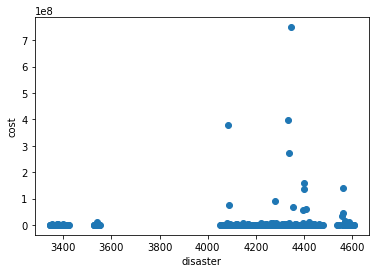

In [16]:
plt.scatter(X, y)
plt.xlabel("disaster")
plt.ylabel("cost")